In [2]:
# 16, 1m 8.4s, 0.1, 3.2, 0, 1m 53, 0, 0.8

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
import seaborn as 
# processed db includes datetime and data is converted to numeric
db_file_path = "../data/can_data_processed_23112023.db"
conn = sqlite3.connect(db_file_path)

In [10]:
# plot consistency
sns.set_style("whitegrid")
sns.set_palette("pastel")
common_figsize = (14, 8)

In [3]:
query = "SELECT * FROM ProcessedCANData"
df = pd.read_sql_query(query, conn)
conn.close()

In [4]:
df.columns

Index(['DrBack_Press', 'Supply_Press', 'Oil_Temp', 'Cool_Temp',
       'Steering_Angle', 'Amb_Temp', 'FuelPressure', 'Cab_Angle', 'Drive_Dir',
       'timestamp', 'WorkPump_Press', 'file', 'ChargedAir_Press',
       'RetFilt_Press', 'CraneSwivel_Angle', 'HeadPump_Angle', 'DrFor_Press',
       'Engine_Load', 'Bat_Volt', 'Oil_Press', 'Speed', 'FrameFB_Angle',
       'FrameLR_Angle', 'RPM_DriveMot', 'WorkPump_Q', 'RPM_Diesel',
       'datetime'],
      dtype='object')

In [42]:
data = df.loc[:,~df.columns.isin(['datetime', 'file', 'timestamp'])]

In [43]:
data.columns

Index(['DrBack_Press', 'Supply_Press', 'Oil_Temp', 'Cool_Temp',
       'Steering_Angle', 'Amb_Temp', 'FuelPressure', 'Cab_Angle', 'Drive_Dir',
       'WorkPump_Press', 'ChargedAir_Press', 'RetFilt_Press',
       'CraneSwivel_Angle', 'HeadPump_Angle', 'DrFor_Press', 'Engine_Load',
       'Bat_Volt', 'Oil_Press', 'Speed', 'FrameFB_Angle', 'FrameLR_Angle',
       'RPM_DriveMot', 'WorkPump_Q', 'RPM_Diesel'],
      dtype='object')

In [7]:
descriptive_stats = data.describe()
skewness = data.skew()
kurtosis = data.kurtosis()

all_stats = pd.concat([descriptive_stats, skewness, kurtosis], axis=1)
all_stats.rename({0: 'skewness', 1: 'kurtosis'}, inplace=True)

correlation_matrix = data.corr(method='kendall')

In [7]:
print(len(data["DrBack_Press"]) - np.sum(data["DrBack_Press"] == 0.0))

1069958


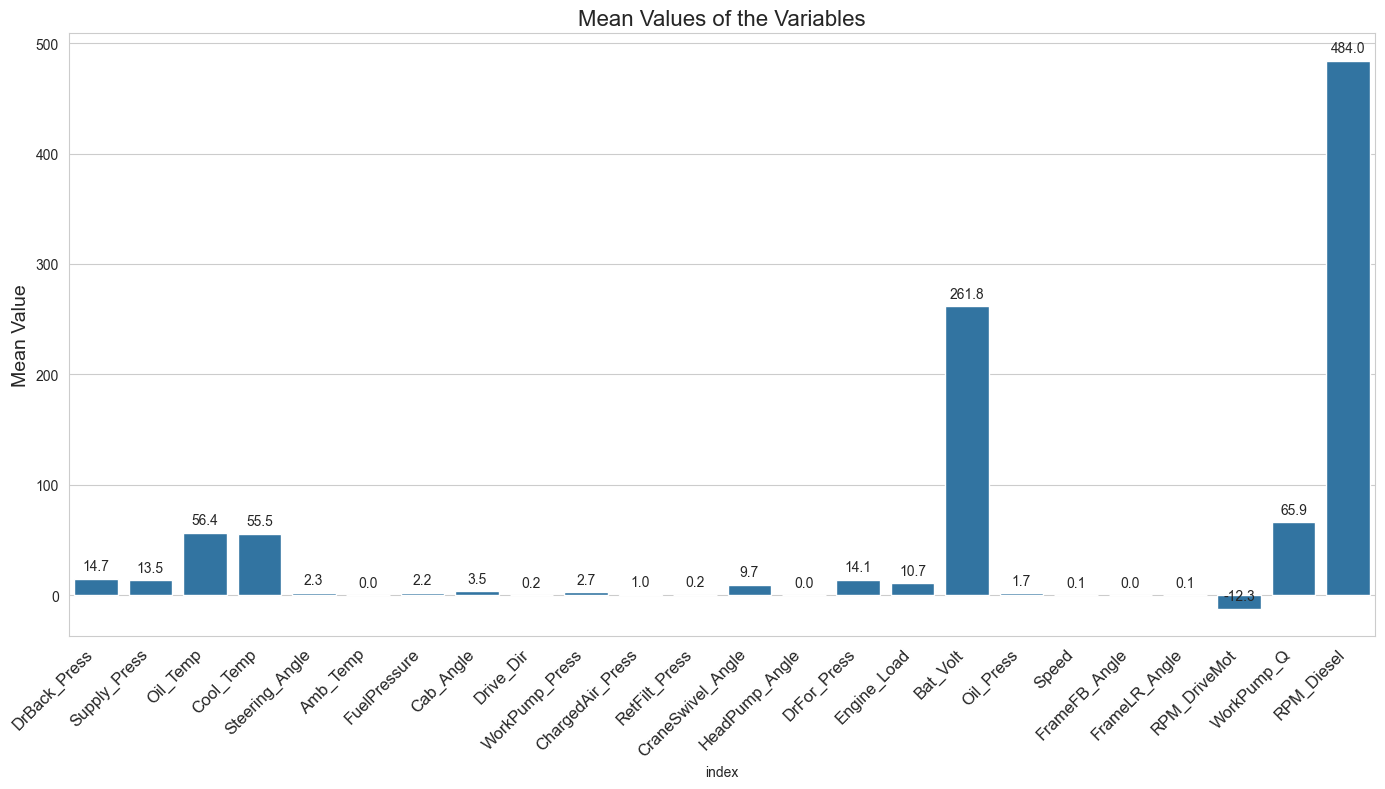

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=common_figsize)
ax = sns.barplot(data=descriptive_stats.loc['mean'].reset_index(), x='index', y='mean')
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.ylabel('Mean Value', fontsize=14)
plt.title('Mean Values of the Variables', fontsize=16)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.subplots_adjust(bottom=0.15, top=0.9)
plt.tight_layout()
plt.show()


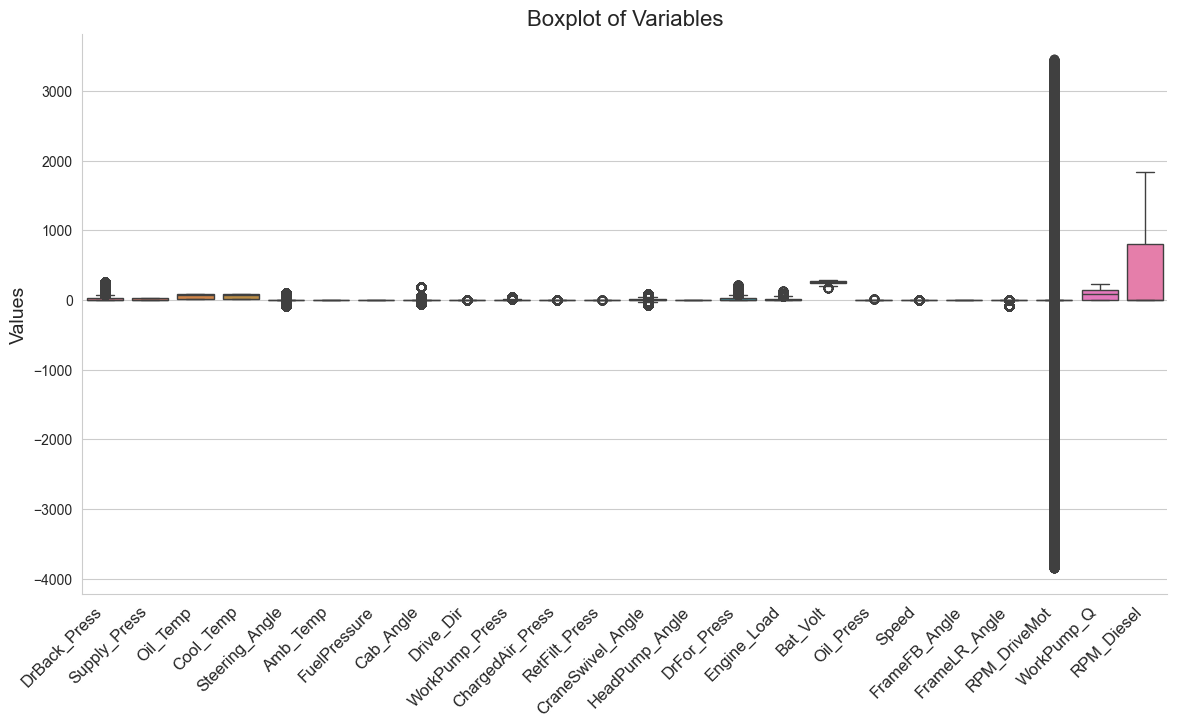

In [12]:
plt.figure(figsize=common_figsize)
sns.boxplot(data=data)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.ylabel('Values', fontsize=14)
plt.title('Boxplot of Variables', fontsize=16)
plt.subplots_adjust(bottom=0.2, top=0.9)
sns.despine()
plt.show()

In [40]:
data.columns

AttributeError: 'Series' object has no attribute 'columns'

In [22]:
skewness = skewness.rename("skewness").reset_index()

,index,skewness
0,DrBack_Press,3.104393
1,Supply_Press,0.117122
2,Oil_Temp,-0.490951
3,Cool_Temp,-0.557056
4,Steering_Angle,4.452143
5,Amb_Temp,0.000000
6,FuelPressure,0.123955
7,Cab_Angle,3.083758
8,Drive_Dir,0.651446
9,WorkPump_Press,3.808958


C:\Users\U\AppData\Local\Temp\ipykernel_9208\1691352064.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=skewness, x='index', y='skewness', palette='viridis')


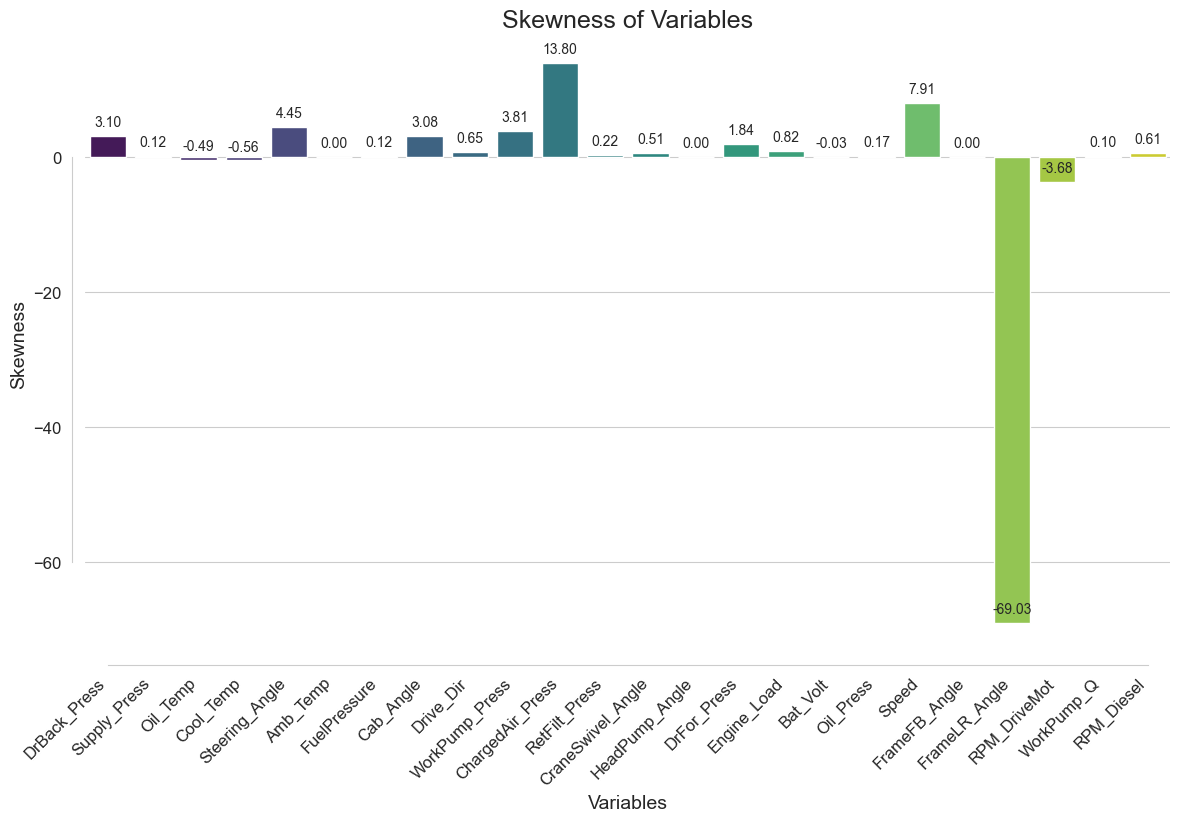

In [31]:
plt.figure(figsize=common_figsize)
bar = sns.barplot(data=skewness, x='index', y='skewness', palette='viridis')
bar.set_title('Skewness of Variables', fontsize=18)
bar.set_xlabel('Variables', fontsize=14)
bar.set_ylabel('Skewness', fontsize=14)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [32]:
kurtosis = kurtosis.rename("kurtosis").reset_index()

DrBack_Press           23.696285
Supply_Press           -1.975733
Oil_Temp               -1.470458
Cool_Temp              -1.426796
Steering_Angle         55.701279
Amb_Temp                0.000000
FuelPressure           -1.961738
Cab_Angle              24.062728
Drive_Dir               0.797246
WorkPump_Press         16.392939
ChargedAir_Press      472.567015
RetFilt_Press          -1.643623
CraneSwivel_Angle       2.215639
HeadPump_Angle          0.000000
DrFor_Press            10.676669
Engine_Load             0.610495
Bat_Volt               -1.875652
Oil_Press              -1.875290
Speed                  69.467142
FrameFB_Angle           0.000000
FrameLR_Angle        5664.764239
RPM_DriveMot           69.739187
WorkPump_Q             -1.773718
RPM_Diesel             -1.016291
dtype: float64

C:\Users\U\AppData\Local\Temp\ipykernel_9208\2653301345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=kurtosis.index, y=kurtosis.values, palette='viridis')


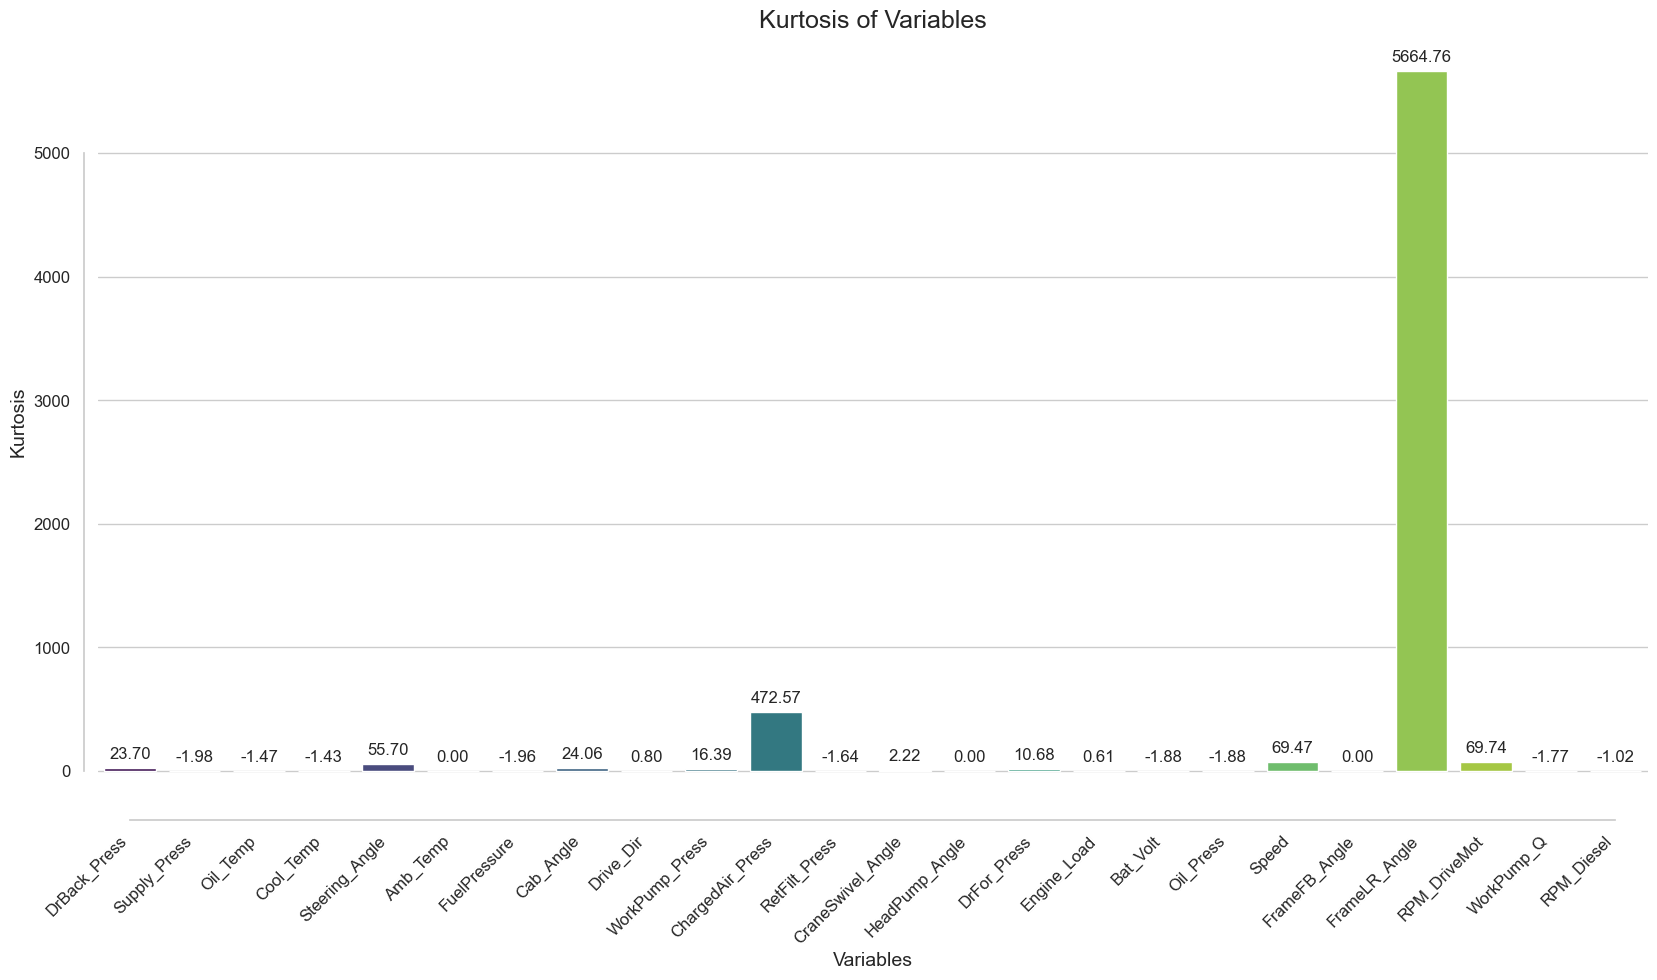

In [35]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
bar = sns.barplot(x=kurtosis.index, y=kurtosis.values, palette='viridis')
bar.set_title('Kurtosis of Variables', fontsize=18)
bar.set_xlabel('Variables', fontsize=14)
bar.set_ylabel('Kurtosis', fontsize=14)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.show()

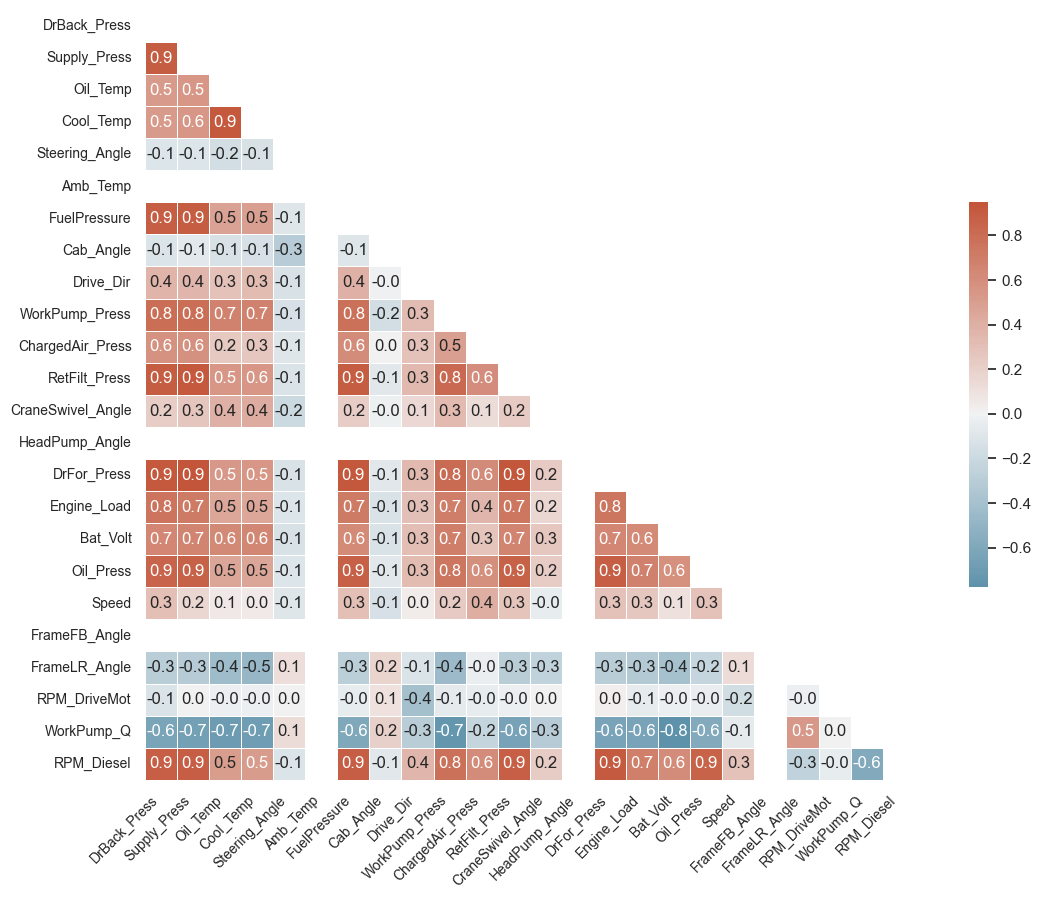

In [36]:
plt.figure(figsize=(14, 10))
sns.set(style="white")
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, mask=mask, fmt=".1f", cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [37]:
def freedman_diaconis_bins(data):
    data = data.astype(float)
    if len(data) > 1 and data.nunique() > 1:  
        quartile_range = np.percentile(data, 75) - np.percentile(data, 25)
        if quartile_range == 0:
            return 1  
        bin_width = 2 * quartile_range * (len(data) ** (-1/3))
        num_bins = (data.max() - data.min()) / bin_width
        return max(1, round(num_bins))  
    else:
        return 1  

def remove_outliers(df, column, multiplier=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    if iqr == 0:  # Handle case where all data points are the same
        return df
    lower_bound = q1 - (multiplier * iqr)
    upper_bound = q3 + (multiplier * iqr)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

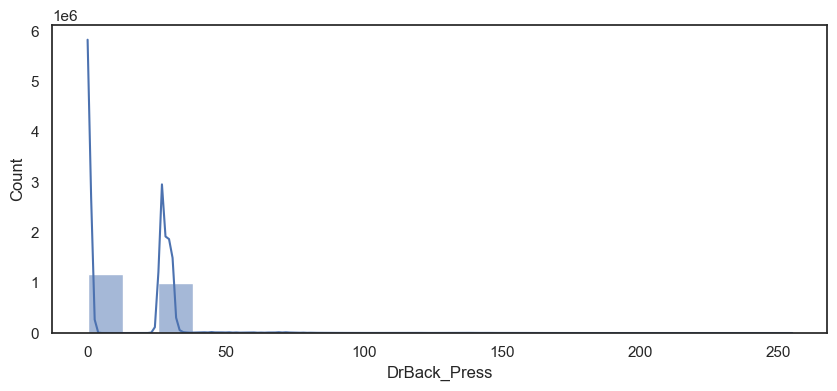

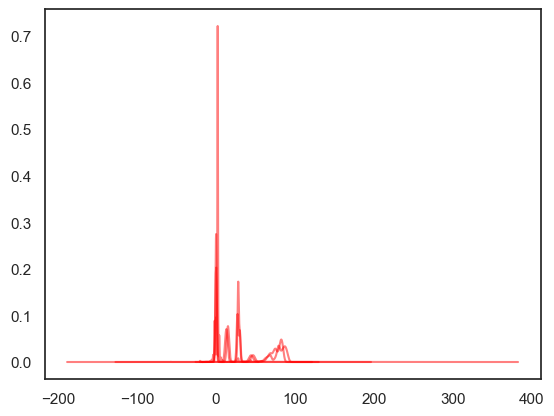

In [44]:
for column in data.columns:
    if data[column].isna().all():
        continue
    
    column_data = data[column].dropna()
    bins = freedman_diaconis_bins(column_data) if len(column_data) > 1 else 1

    plt.figure(figsize=(10, 4))
    plt.hist(column_data, bins=bins, edgecolor='black', alpha=0.7, density=True)
    sns.histplot(column_data, bins=20, kde=True)

    data.plot(kind='kde', color='red', alpha=0.5)

    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

In [45]:
cleaned_df = data.copy()

for column in data.columns:
    if data[column].dtype in ['float64', 'int64'] and data[column].nunique() > 1:
        cleaned_df = remove_outliers(cleaned_df, column)

In [48]:
cleaned_df.columns

Index(['DrBack_Press', 'Supply_Press', 'Oil_Temp', 'Cool_Temp',
       'Steering_Angle', 'Amb_Temp', 'FuelPressure', 'Cab_Angle', 'Drive_Dir',
       'WorkPump_Press', 'ChargedAir_Press', 'RetFilt_Press',
       'CraneSwivel_Angle', 'HeadPump_Angle', 'DrFor_Press', 'Engine_Load',
       'Bat_Volt', 'Oil_Press', 'Speed', 'FrameFB_Angle', 'FrameLR_Angle',
       'RPM_DriveMot', 'WorkPump_Q', 'RPM_Diesel'],
      dtype='object')

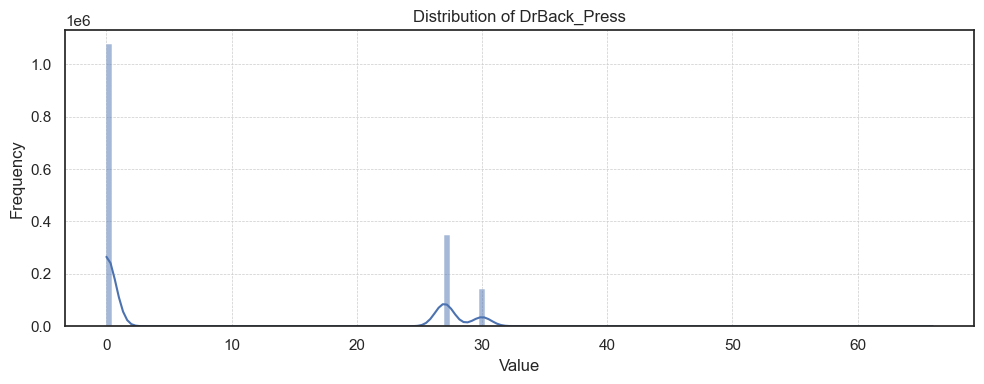

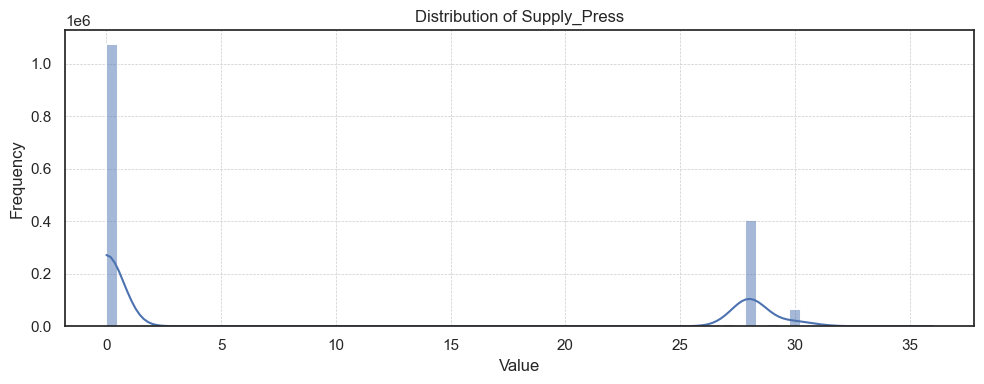

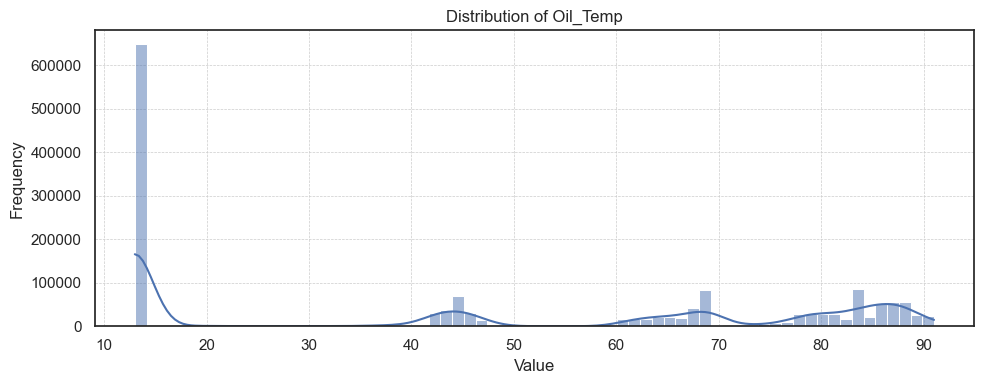

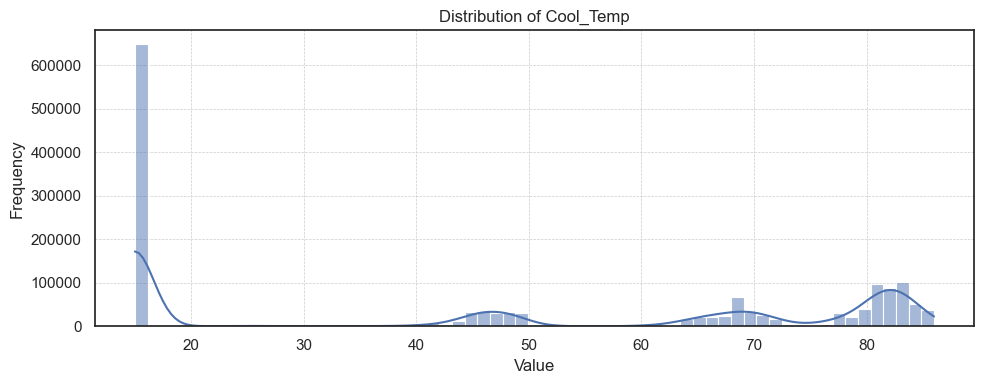

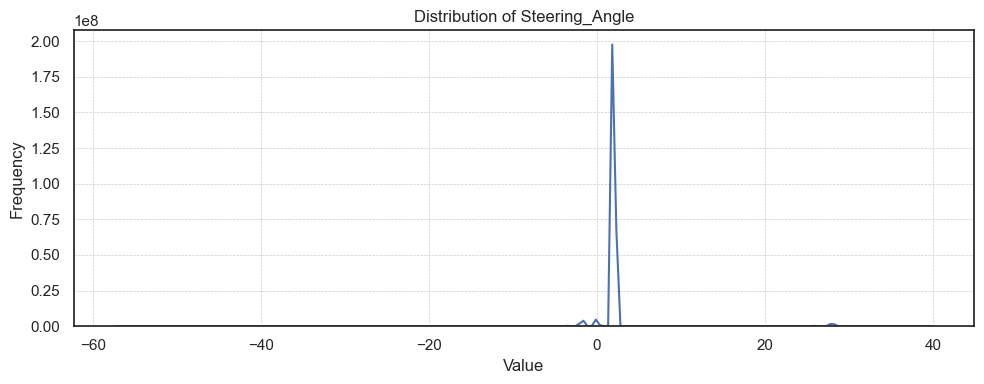

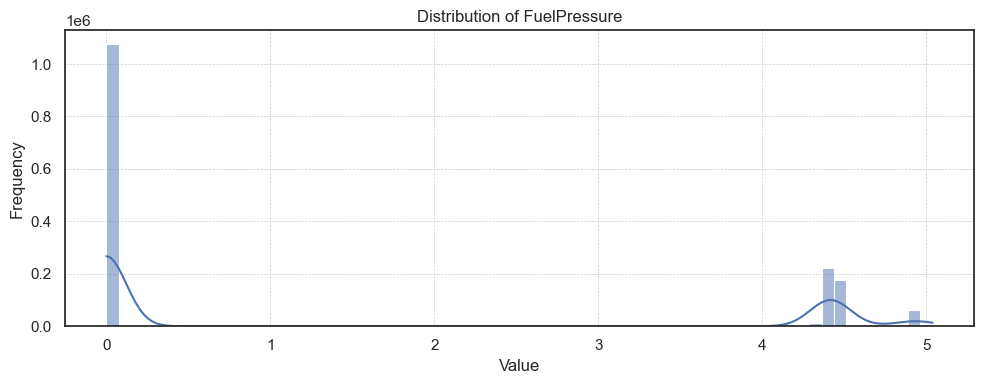

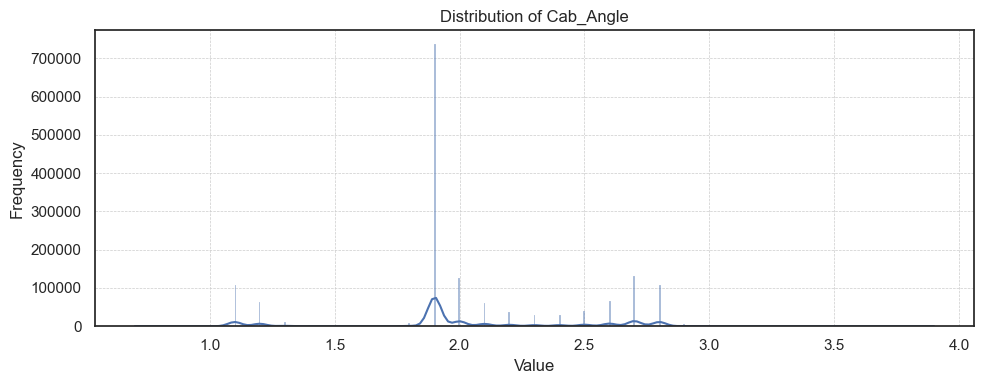

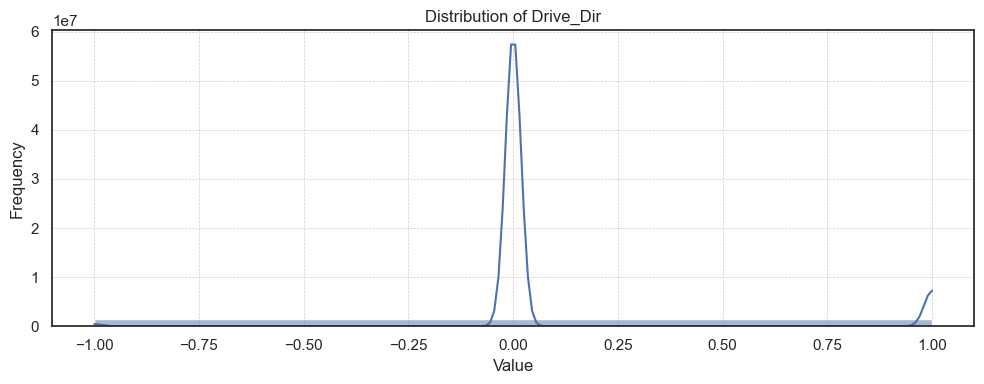

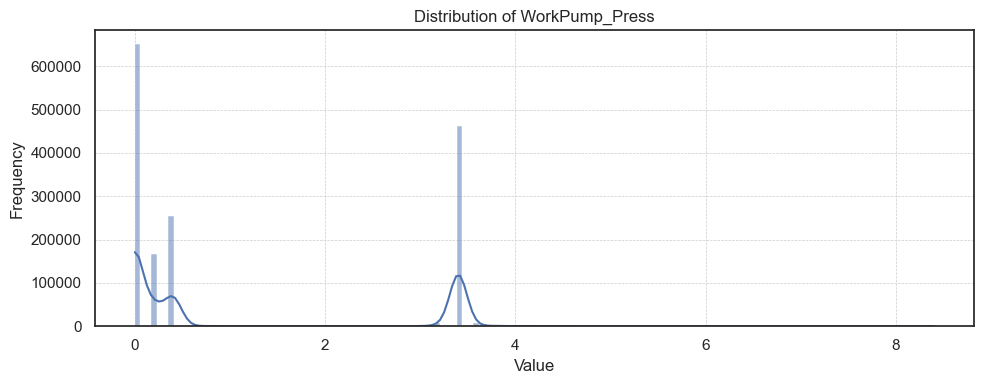

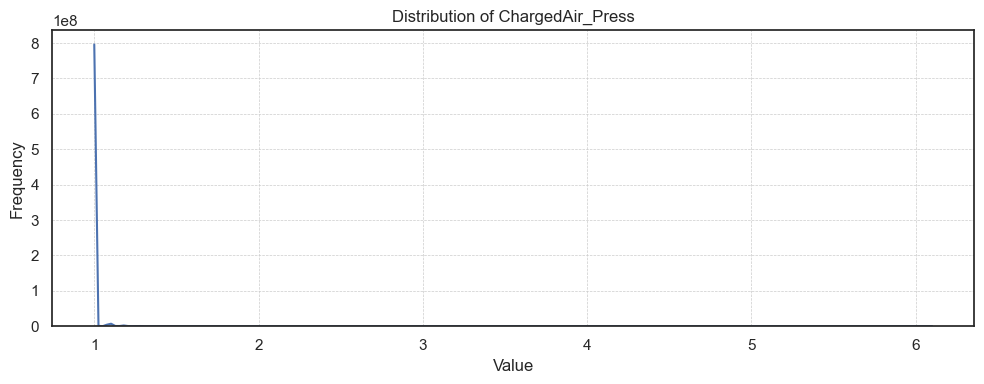

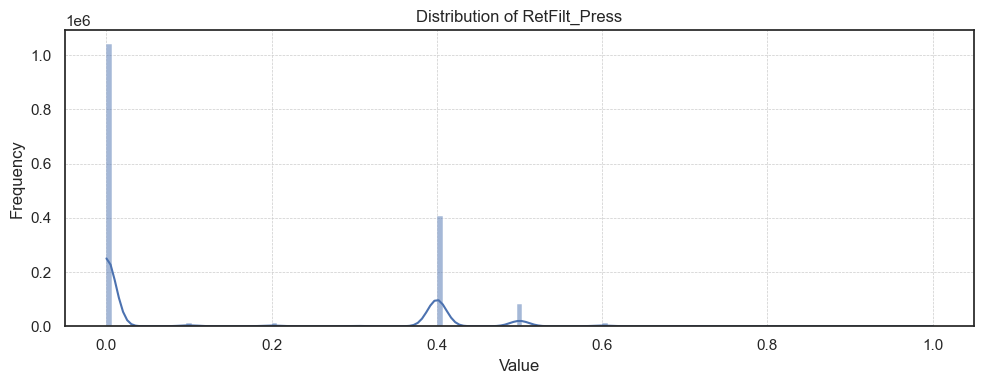

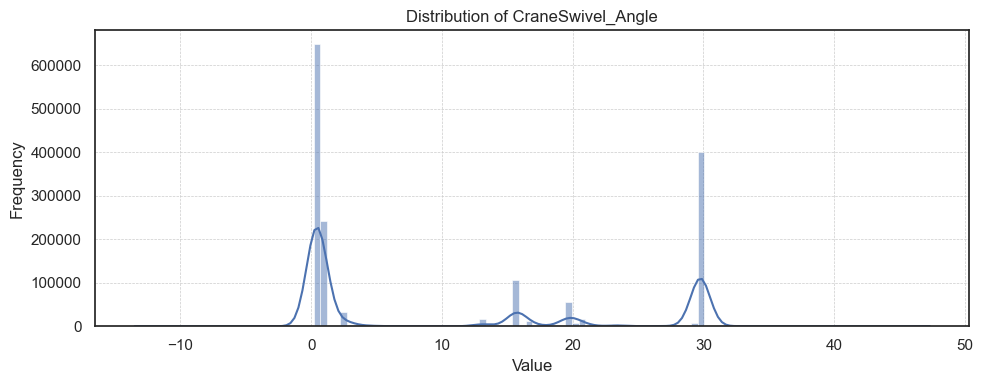

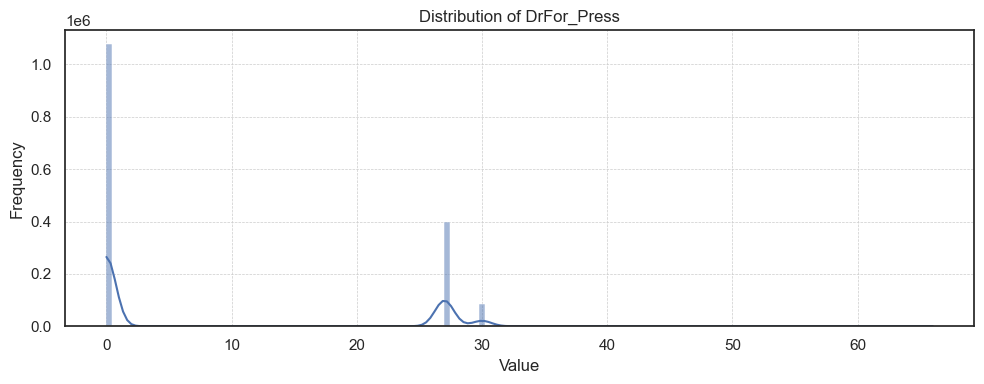

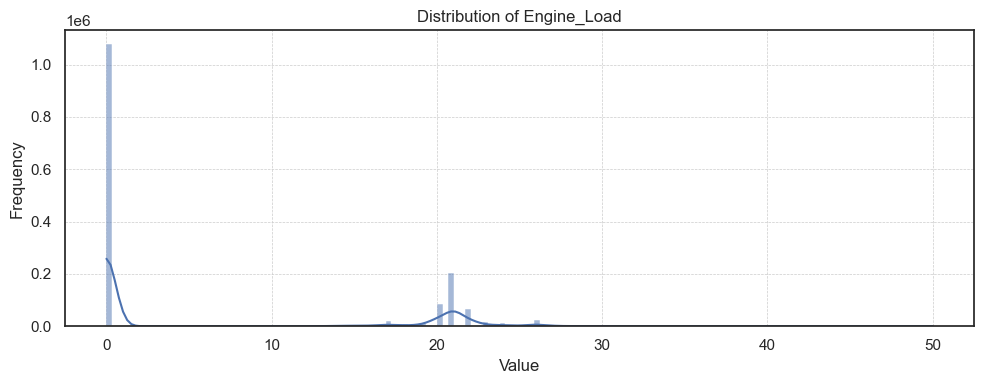

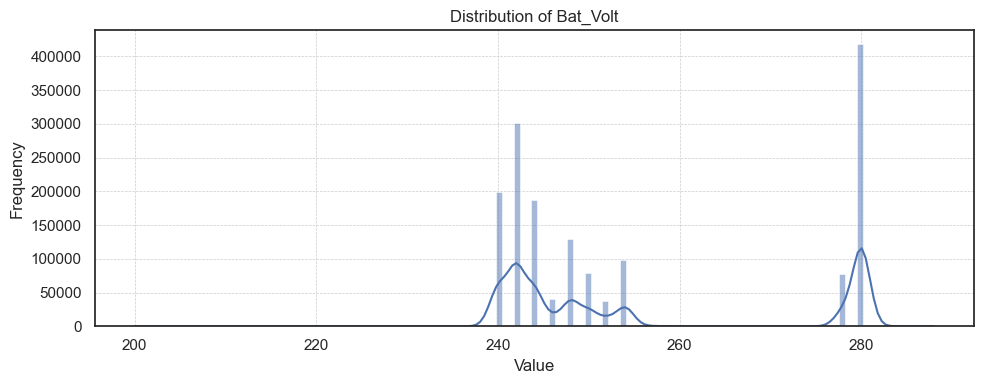

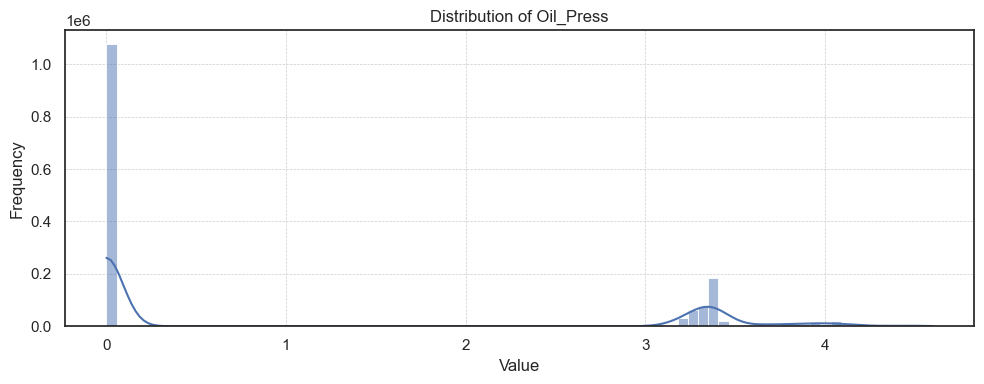

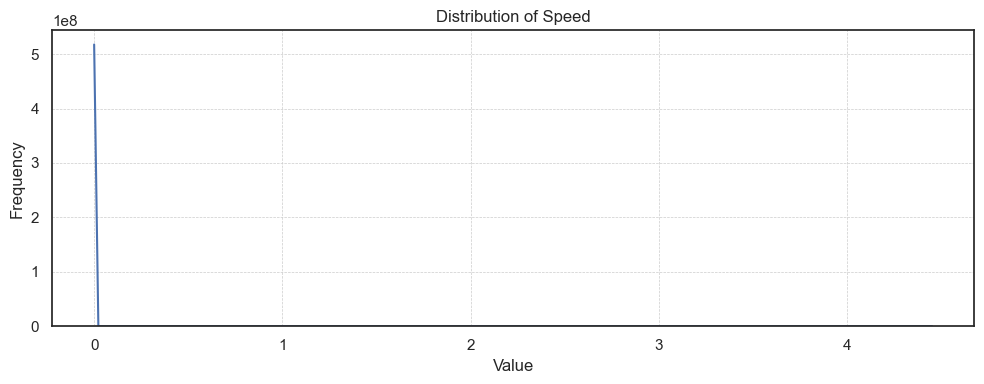

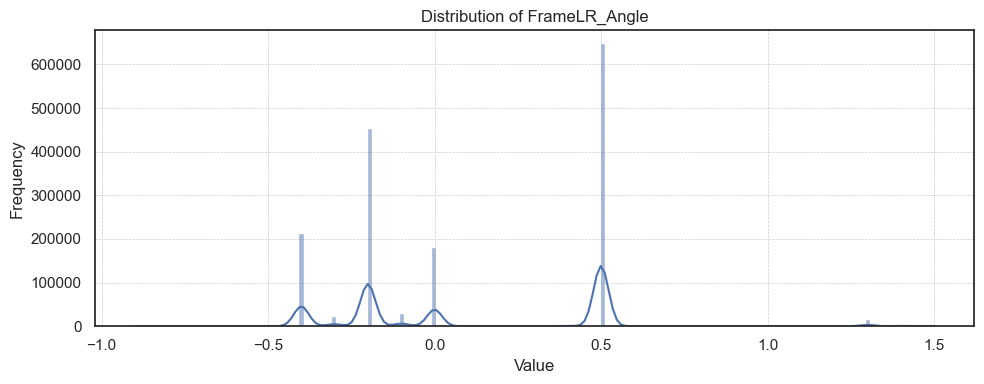

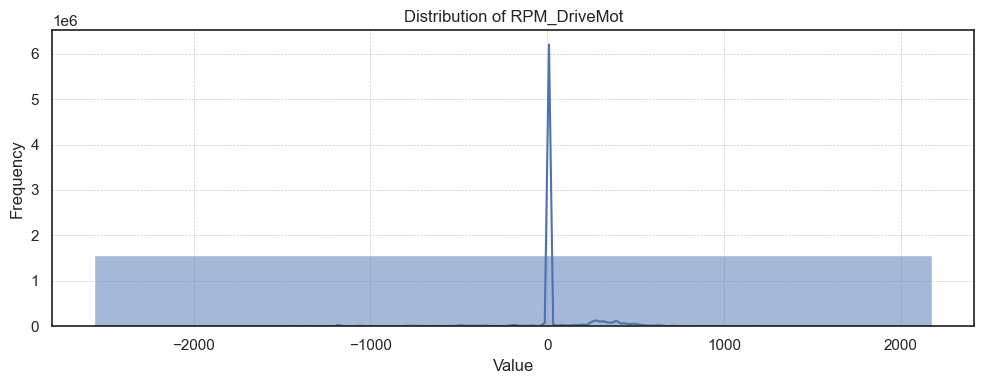

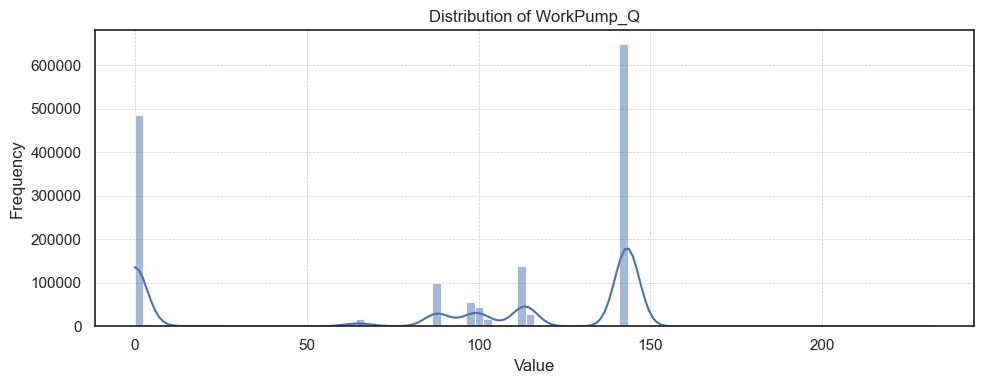

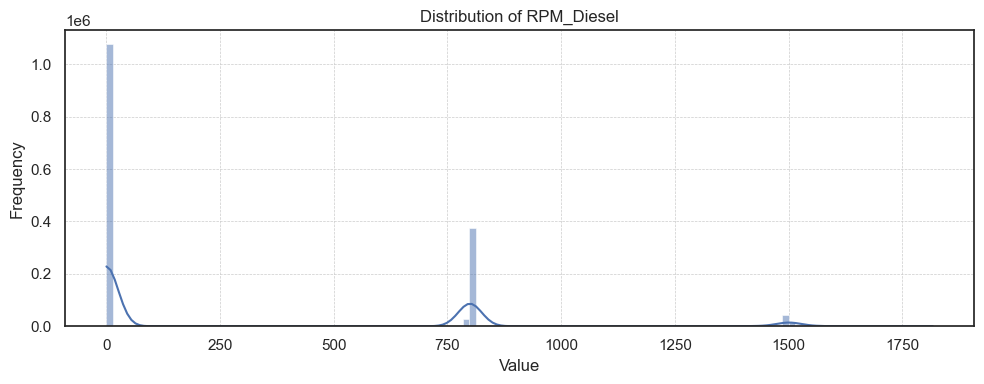

In [49]:
for column in cleaned_df.columns:
    if cleaned_df[column].isna().all()  or cleaned_df[column].nunique() == 1:
        continue
    try:
        column_data = pd.to_numeric(cleaned_df[column].dropna(), errors='coerce')
        bins = freedman_diaconis_bins(column_data) if len(column_data) > 1 else 1
    except ValueError:
        continue

    plt.figure(figsize=(10, 4))
    plt.hist(column_data, bins=bins, edgecolor='black', alpha=0.7, density=True)

    if column_data.nunique() != 1:  
        sns.histplot(column_data, bins=bins, kde=True)

    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    
    plt.show()
